# Exercises for Week 10

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Linear regression (naive vs. accelerated)

=== For-loop version ===
Slope: 2.9963, Intercept: 1.9281, Time: 0.745 ms

=== Naive version ===
Slope: 2.9963, Intercept: 1.9281, Time: 0.642 ms

=== Matrix-based version ===
Slope: 2.9963, Intercept: 1.9281, Time: 0.219 ms


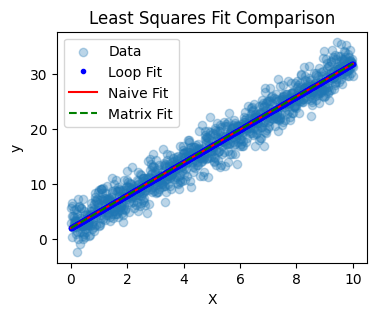

In [2]:
# generate synthetic data
np.random.seed(0)
n_samples = 1000
X = np.linspace(0, 10, n_samples)
true_slope = 3
true_intercept = 2
noise = np.random.randn(n_samples) * 2
y = true_slope * X + true_intercept + noise

# Naive least squares using numpy
def leastSquaresNaive(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    num = np.sum((X - x_mean) * (y - y_mean))
    den = np.sum((X - x_mean) ** 2)

    slope = num / den
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

# least squares using for loop
def LeastSquaresForLoop(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    num = 0
    den = 0
    for i in range(len(X)):
        num += (X[i] - x_mean) * (y[i] - y_mean) 
        den += (X[i] - x_mean) ** 2

    slope = num / den
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

# least squares using matrix operations
def leastSquaresMatrix(X_mat, y):
    theta = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ y
    slope = theta[0]
    intercept = theta[1]
    
    return slope, intercept

# time all methods
start = time.time()
slope_for, intercept_for = LeastSquaresForLoop(X, y)
time_for = time.time() - start

start = time.time()
slope_naive, intercept_naive = leastSquaresNaive(X, y)
time_naive = time.time() - start

X_mat = np.vstack([X, np.ones(n_samples)]).T
start = time.time()
slope_mat, intercept_mat = leastSquaresMatrix(X_mat, y)
time_mat = time.time() - start

# print results and time comparison
print("=== For-loop version ===")
print(f"Slope: {slope_for:.4f}, Intercept: {intercept_for:.4f}, Time: {time_for*1000:.3f} ms")

print("\n=== Naive version ===")
print(f"Slope: {slope_naive:.4f}, Intercept: {intercept_naive:.4f}, Time: {time_naive*1000:.3f} ms")

print("\n=== Matrix-based version ===")
print(f"Slope: {slope_mat:.4f}, Intercept: {intercept_mat:.4f}, Time: {time_mat*1000:.3f} ms")

# visualize the fits
plt.figure(figsize=(4, 3))

plt.scatter(X, y, label='Data', alpha=0.3)
plt.plot(X, slope_naive * X + intercept_naive, 'b.', label='Loop Fit')
plt.plot(X, slope_naive * X + intercept_naive, 'r', label='Naive Fit')
plt.plot(X, slope_mat * X + intercept_mat, 'g--', label='Matrix Fit')
plt.legend()
plt.title("Least Squares Fit Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

#### Gradient descent

Training:   0%|          | 0/100000 [00:00<?, ?it/s]

Early stopping triggered at epoch 24411. Loss did not improve for 100 epochs.


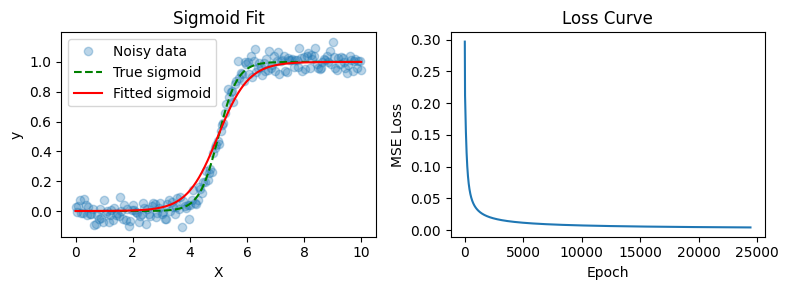

In [3]:
# generate data
np.random.seed(42)
n_samples = 200
X = np.linspace(0, 10, n_samples)
true_y = 1 / (1 + np.exp(-3 * (X - 5)))
y = true_y + np.random.normal(0, 0.05, size=n_samples)

# define model and loss
def sigmoid(z):
    proba = 1 / (1 + np.exp(-z))
    
    return proba

def predict(X, w, b):
    return sigmoid(w * X + b)

# gradient descent with automatic stopping
def train(X, y, lr=0.1, patience=100, min_delta=1e-5, max_epochs=100000):
    w = np.random.randn()
    b = np.random.randn()
    loss_history = []

    best_loss = float("inf")
    no_improve_counter = 0

    for epoch in tqdm(range(max_epochs), desc="Training"):
        # make prediction and compute error
        y_pred = predict(X, w, b)
        error = y_pred - y
        
        # compute gradients
        grad_w = np.mean(2 * error * y_pred * (1 - y_pred) * X)
        grad_b = np.mean(2 * error * y_pred * (1 - y_pred))
        
        # early stopping check
        loss = np.mean((y_pred - y) ** 2)
        loss_history.append(loss)
        
        if loss < best_loss - min_delta:
            best_loss = loss
            no_improve_counter = 0
        else:
            no_improve_counter += 1

        if no_improve_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch}. Loss did not improve for {patience} epochs.")
            break

        # update parameters based on gradients and learning rate
        w -= lr * grad_w
        b -= lr * grad_b

    return w, b, loss_history

# train the model
w, b, loss_history = train(X, y, lr=0.1, patience=100)

# plot the result
y_fit = predict(X, w, b)

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(X, y, "o", alpha=0.3, label="Noisy data")
plt.plot(X, true_y, "g--", label="True sigmoid")
plt.plot(X, y_fit, "r", label="Fitted sigmoid")
plt.title("Sigmoid Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

plt.tight_layout()
plt.show()

#### Maximum likelyhood estimation

Breast Cancer Dataset
Features: 30
Feature names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

First 5 samples:
X[0] = [ 17.99  10.38 122.8 ]... y = 0
X[1] = [ 20.57  17.77 132.9 ]... y = 0
X[2] = [ 19.69  21.25 130.  ]... y = 0
X[3] = [11.42 20.38 77.58]... y = 0
X[4] = [ 20.29  14.34 135.1 ]... y = 0


Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Early stopping at epoch 6901. No improvement for 10 epochs.
Test Accuracy: 97.90%
Train Accuracy: 98.83%


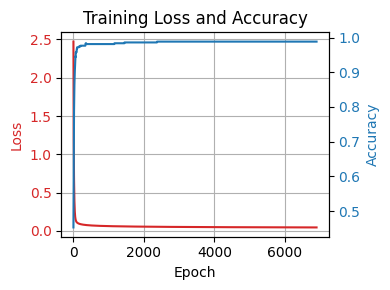

In [4]:
np.random.seed(42)
# load dataset
data = load_breast_cancer()
X_raw, y = data.data, data.target  # y ∈ {0, 1}
feature_names = data.feature_names
target_names = data.target_names

# print dataset info
print("Breast Cancer Dataset")
print(f"Features: {len(feature_names)}")
print(f"Feature names:\n{feature_names.tolist()}")

# print a few data samples
print("\nFirst 5 samples:")
for i in range(5):
    print(f"X[{i}] = {X_raw[i, :3]}... y = {y[i]}")  # only show first 3 features

# pre-processing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


# add bias term (slide 22)
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# logistic model functions 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    return sigmoid(X @ w)

def crossEntropy(y_pred, y_true):
    eps = 1e-10  # avoid log(0)
    ce_loss = -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))
    
    return ce_loss

def accuracy(y_pred_proba, y_true, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    return np.mean(y_pred == y_true)

# training function with early stopping
def train(X, y, lr=0.1, patience=100, min_delta=1e-5, max_epochs=100000):
    w = np.random.randn(X.shape[1])
    loss_history = []
    acc_history = []

    best_loss = float('inf')
    no_improve_counter = 0

    for epoch in tqdm(range(max_epochs), desc="Training"):
        # make predictions and compute cross entropy loss
        y_pred = predict(X, w)
        loss = crossEntropy(y_pred, y)
        
        # compute gradients
        grad = X.T @ (y_pred - y) / len(y)

        loss_history.append(loss)
        acc_history.append(accuracy(y_pred, y))

        if loss < best_loss - min_delta:
            best_loss = loss
            no_improve_counter = 0
        else:
            no_improve_counter += 1

        if no_improve_counter >= patience:
            print(f"Early stopping at epoch {epoch}. No improvement for {patience} epochs.")
            break

        # gradient descent
        w -= lr * grad

    return w, loss_history, acc_history

# train the model
w, loss_history, acc_history = train(X_train_bias, y_train, lr=0.1, patience=10, max_epochs=10000)

# evaluate on test set
test_pred = predict(X_test_bias, w)
test_acc = accuracy(test_pred, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

train_pred = predict(X_train_bias, w)
train_acc = accuracy(train_pred, y_train)
print(f"Train Accuracy: {train_acc * 100:.2f}%")

#print(f"Best train Accuracy: {acc_history[-1] * 100:.2f}%")
#print(f"Test Accuracy: {test_acc * 100:.2f}%")

# plot loss and accuracy together
fig, ax1 = plt.subplots(figsize=(4, 3))

ax1.plot(loss_history, color='tab:red', label='Train Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(acc_history, color='tab:blue', label='Train Accuracy')
ax2.set_ylabel("Accuracy", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Training Loss and Accuracy")
plt.tight_layout()
plt.show()